In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick

In [25]:

# get param set
paramsets =  pd.read_csv('../../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
paramsets.drop('theta',inplace=True, axis=1)
paramsets.drop('ro_B',inplace=True, axis=1)
paramsets.drop('k_sorp',inplace=True, axis=1)
paramsets.drop('CSS_max',inplace=True, axis=1)
#paramsets.drop('K_L',inplace=True, axis=1)
selectedSets = [17,27,38,44,85]#[19, 47, 76, 83]
paramsets['Pset']= [i for i in range(99)]
#paramsets = paramsets.loc[[19, 47, 76, 83]]#paramsets.loc(selectedSets)

In [26]:
paramsets.columns

Index(['beta_C', 'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C',
       'k_d,O', 'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L',
       'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CL_init',
       'CS_init', 'Pset'],
      dtype='object')

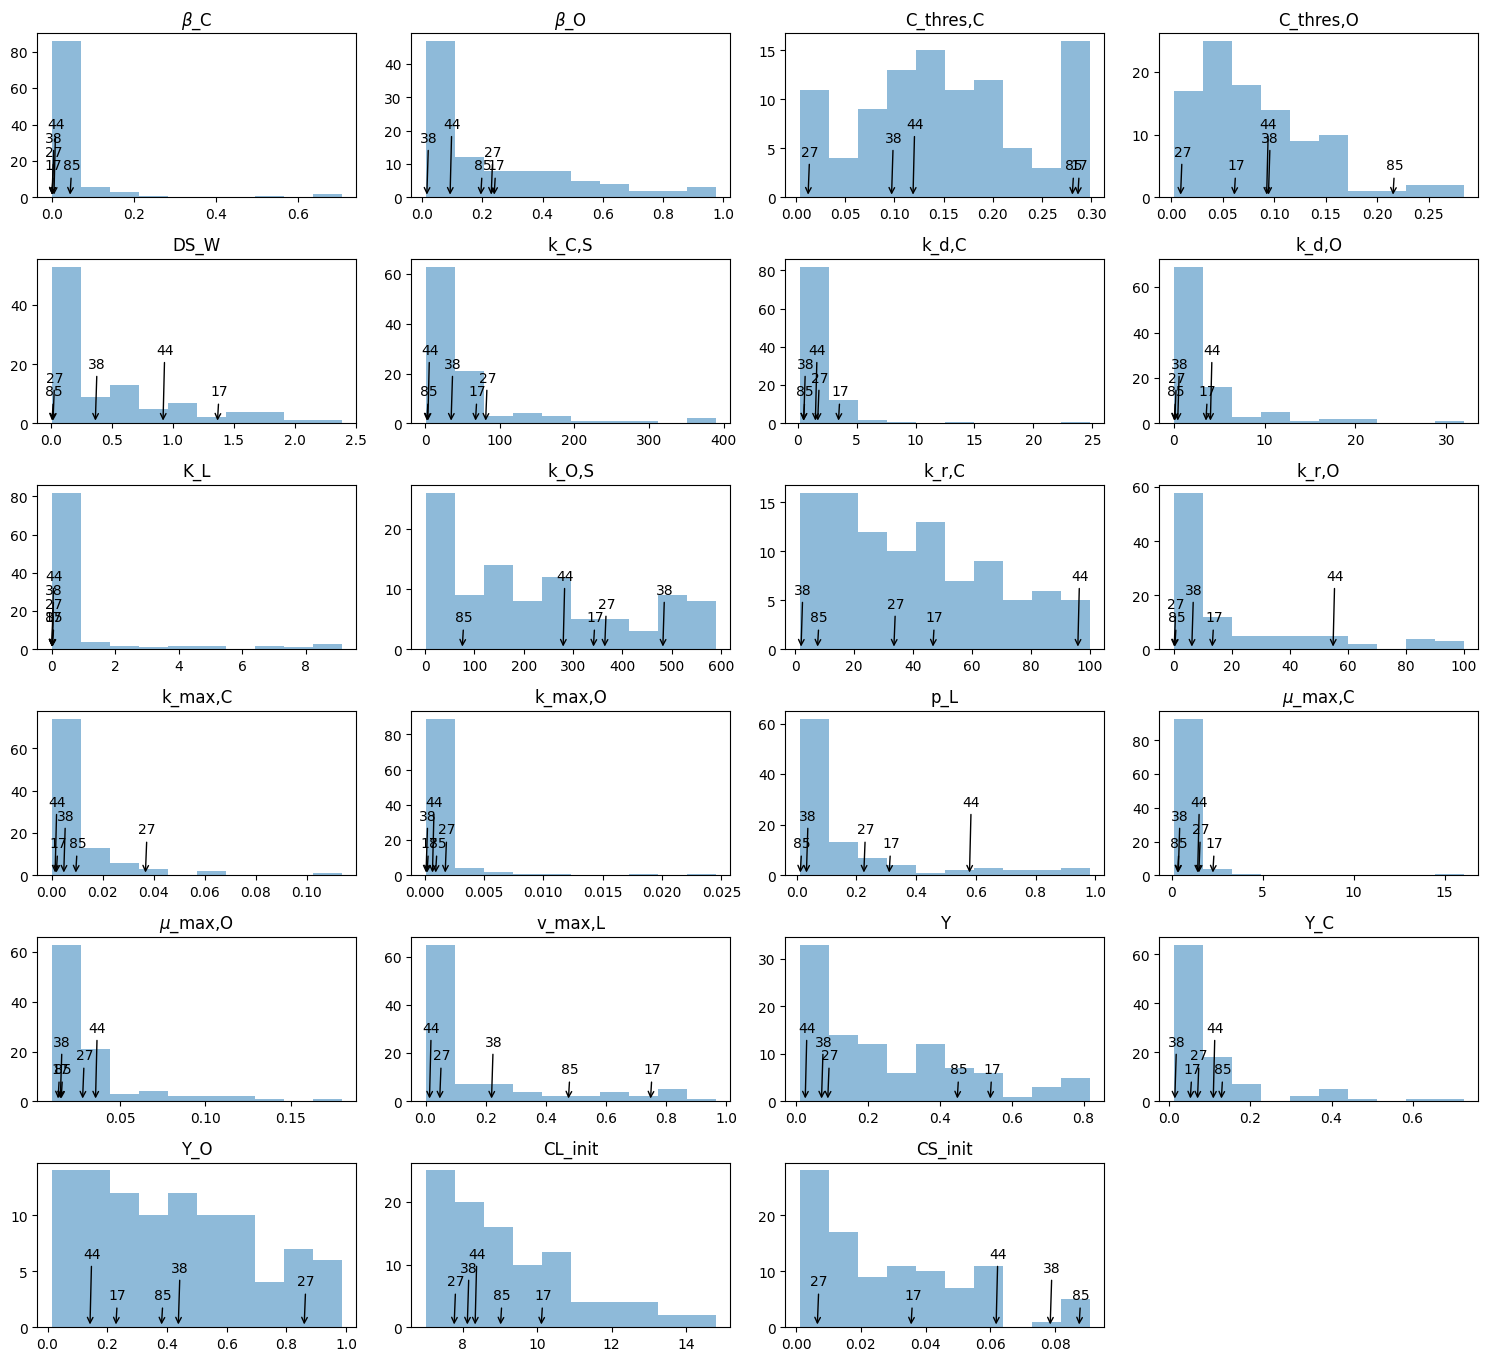

In [28]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_cols = 4
num_rows = int(np.ceil(len(paramsets.columns[:-1])/3))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets.columns[:-1]):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets[column], alpha=0.5)
    
    if column[:2] == 'u_':
        ax.set_title(r'$\mu$_'+column[2:])
    elif column[:2] == 'm_':
        ax.set_title('k_'+column[2:])
    elif column[:5] == 'beta_':
        ax.set_title(r'$\beta$_'+column[5:])
    else:
        ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]*2
    ytexts = [20, 30, 40, 50]*2
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets.columns)-1, num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

IndexError: list index out of range

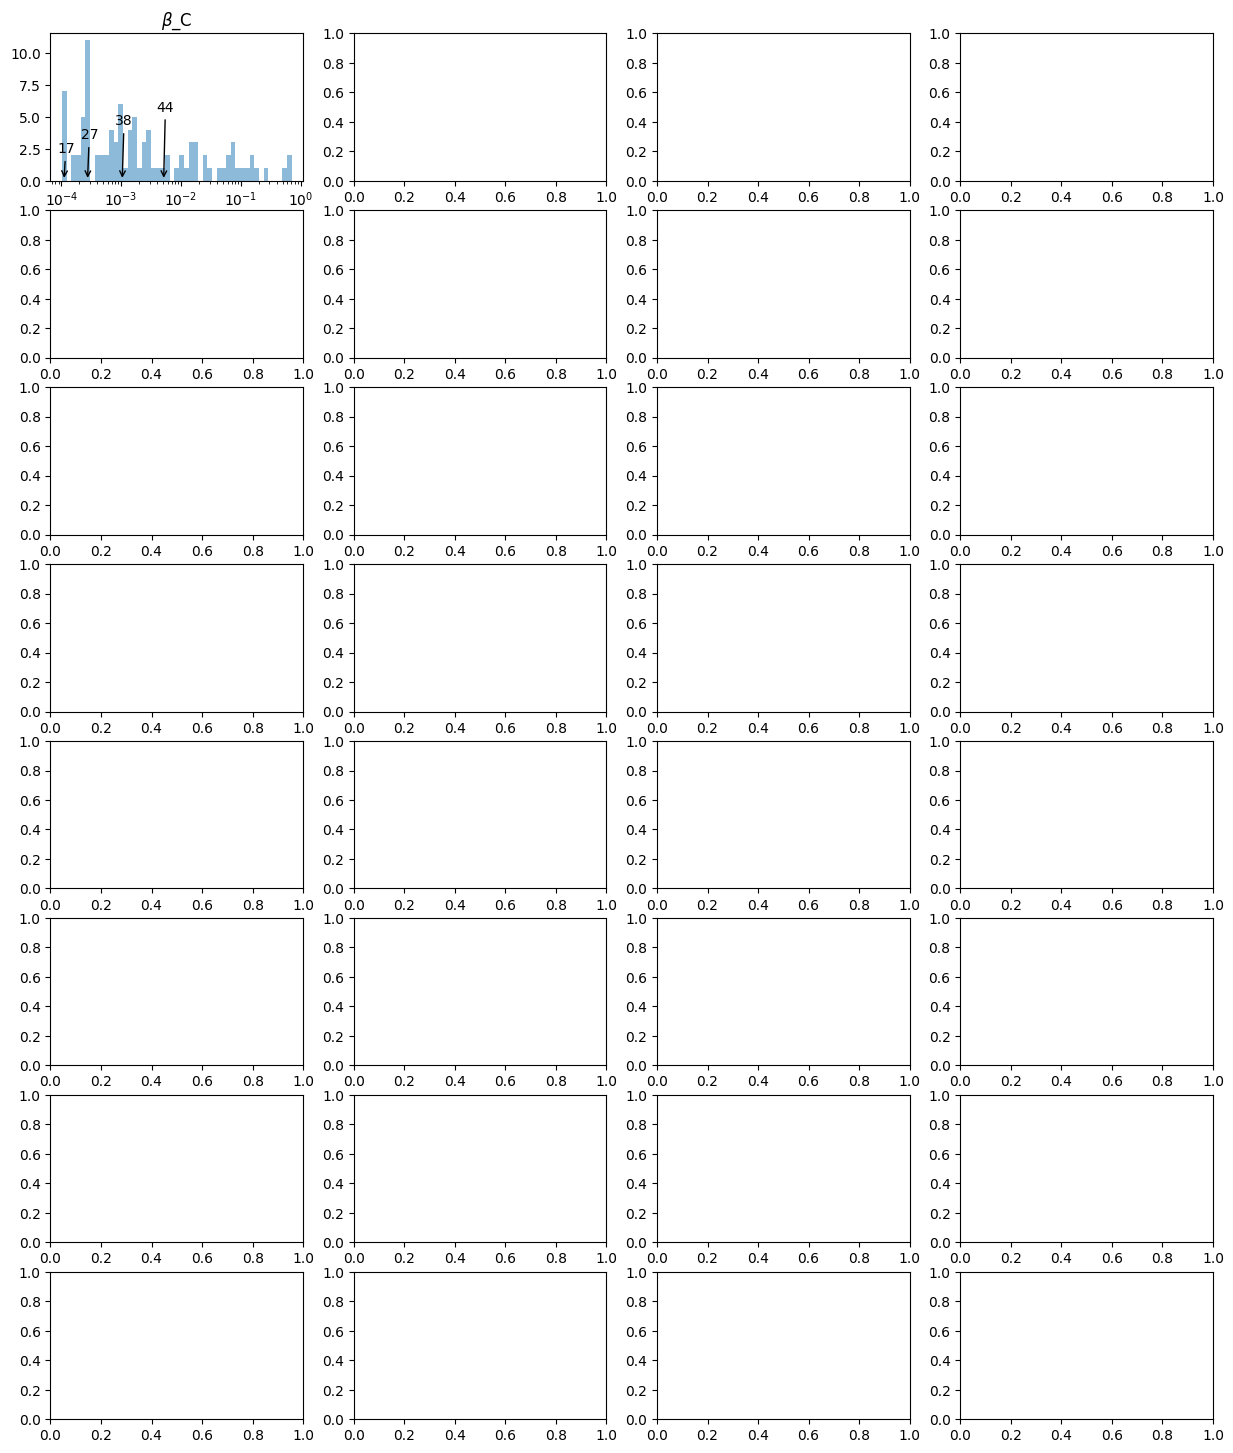

In [29]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_cols = 4
num_rows = int(np.ceil(len(paramsets.columns[:-1])/3))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets.columns[:-1]):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets[column], alpha=0.5, 
            bins=np.logspace(np.log10(min( paramsets[column])),
                             np.log10(max( paramsets[column])), 50))
    
    if column[:2] == 'u_':
        ax.set_title(r'$\mu$_'+column[2:])
    elif column[:2] == 'm_':
        ax.set_title('k_'+column[2:])
    elif column[:5] == 'beta_':
        ax.set_title(r'$\beta$_'+column[5:])
    else:
        ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
        ax.set_xscale('log')

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets.columns)-1, num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
repr(paramsets.columns.tolist())

In [ ]:
# from parameter constraints
paramsets_ = pd.DataFrame()
paramsets_['u_max,C/u_max,O'] = paramsets['u_max,C']/paramsets['u_max,O'] # growth rate
paramsets_['m_max,C/m_max,O'] = paramsets['m_max,C']/paramsets['m_max,O'] # Maximum maintenance rate coef. 
paramsets_['k_C,S/k_O,S'] = paramsets['k_C,S']/paramsets['k_O,S'] # substrate affinity to small molecules
paramsets_['k_r,O/k_d,O'] = paramsets['k_r,O']/paramsets['k_d,O']
paramsets_['k_r,C/k_d,C'] = paramsets['k_r,C']/paramsets['k_d,C']
paramsets_['k_C,S/k_O,S'] = paramsets['k_C,S']/paramsets['k_O,S']


paramsets_['k_r,O/u_max,O'] = paramsets['k_r,O']/paramsets['u_max,O']
paramsets_['k_d,O/u_max,O'] = paramsets['k_d,O']/paramsets['u_max,O']
paramsets_['k_r,C/u_max,C'] = paramsets['k_r,C']/paramsets['u_max,C']
paramsets_['k_d,C/u_max,C'] = paramsets['k_d,C']/paramsets['u_max,C']

paramsets_['C_thres,C/C_thres,O'] = paramsets['C_thres,C']/paramsets['C_thres,O']
paramsets_['u_max,C/m_max,C'] = paramsets['u_max,C']/paramsets['m_max,C']
paramsets_['u_max,O/m_max,O'] = paramsets['u_max,O']/paramsets['m_max,O']
#paramsets['kCS_kOS'] = paramsets['k_C,S']/paramsets['k_O,S']
paramsets_['Y_C/Y_O'] = paramsets['Y_C']/paramsets['Y_O']

In [ ]:
[(i, column) for i, column in enumerate(paramsets_.columns)]

In [ ]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets_.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets_[column], alpha=0.5)
    title_ = column
    title_ = title_.replace("m_","k_")
    title_ =title_.replace("u_",r'$\mu$_')
    #print(column, title_)
    ax.set_title(title_)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets_[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets_.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets_.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets_[column], alpha=0.5, 
            bins=np.logspace(np.log10(min( paramsets_[column])),
                             np.log10(max( paramsets_[column])), 50))
    
    title_ = column
    title_ = title_.replace("m_","k_")
    title_ =title_.replace("u_",r'$\mu$_')
    #print(column, title_)
    ax.set_title(title_)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets_[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax.set_xscale('log')

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets_.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [13]:
repr(paramsets.columns.tolist())

"['beta_C', 'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C', 'k_d,O', 'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L', 'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CL_init', 'CS_init', 'Pset']"

In [20]:
paramsets['CS_init']

0     0.006590
1     0.036058
2     0.012511
3     0.031606
4     0.090463
        ...   
94    0.038680
95    0.019544
96    0.047272
97    0.014316
98    0.002712
Name: CS_init, Length: 99, dtype: float64

In [21]:
paramsets_ = pd.DataFrame()
# mol/cm3 * [g/mol] * [mg/g]
C_aInitO = 9.16666666666667e-07 * 12 * 1000
C_dInitO = 8.33333333333333e-06 * 12 * 1000
C_aInitC = 8.33333333333333e-07 * 12 * 1000
C_dInitC = 8.33333333333333e-06 * 12 * 1000

kads = 7.07e+02 # m3/kgC/yr, see 10.1016/j.soilbio.2020.107912, A.3
yr_per_d = 1/365 # [yr/d]
m3_per_cm3 = 1e-6; # m3/cm3
cm3_per_m3 = 1e6; # cm3/m3
mg_per_kgC = 1e6 # mg/kg
# [m3/kgC/yr] * [yr/d] * [cm3/m3] * [kgC/mg] = [cm3/mg/d]
kads = kads * yr_per_d * cm3_per_m3 * mg_per_kgC
kdes =  1.63e+03 # [1/yr] see 10.1016/j.soilbio.2020.107912, A.3
kdes = kdes * yr_per_d # [1/d]
paramsets['CS_init'] =0.2
# C_thresC, C_thresO, CS_init have strong correlation
# mgC/cm3 water

# O
paramsets_['phiO'] = 1/(1 + np.exp(
    (paramsets['C_thres,O'] - 
     paramsets['CS_init'])/(0.1 * paramsets['C_thres,O'])))

paramsets_['S_deactO']  = (1 - paramsets_['phiO'] ) * paramsets['k_d,O']  * C_aInitO
paramsets_['S_reactO']  = paramsets_['phiO']  *  paramsets['k_r,O']  * C_dInitO
paramsets_['S_uptake_S_AO'] = (paramsets['m_max,O'] * paramsets['CS_init'] * paramsets['k_O,S'])/(paramsets['m_max,O'] + paramsets['CS_init'] * paramsets['k_O,S']) * C_aInitO
paramsets_['S_uptake_S_DO'] = (paramsets['m_max,O'] * paramsets['CS_init'] * paramsets['k_O,S']
                              )/(paramsets['m_max,O'] + paramsets['CS_init'] * paramsets['k_O,S']) * paramsets['beta_O'] * C_dInitO

paramsets_['S_decay_AO'] = paramsets['m_max,O'] * C_aInitO  - paramsets_['S_uptake_S_AO'] 
paramsets_['S_decay_DO'] = paramsets['m_max,O'] * paramsets['beta_O']  * C_dInitO - paramsets_['S_uptake_S_DO'] 

paramsets_['S_growthO'] = (paramsets['u_max,O'] * paramsets['CS_init'] * paramsets['k_O,S'])/(paramsets['u_max,O'] + paramsets['CS_init'] * paramsets['k_O,S']) * C_aInitO

# sum
paramsets_['S_uptake_S'] = paramsets_['S_uptake_S_AO'] + paramsets_['S_uptake_S_DO']
paramsets_['S_decay'] = paramsets_['S_decay_AO'] + paramsets_['S_decay_DO']
paramsets_['S_growth'] = paramsets_['S_growthO'] #(1/paramsets['Y_O']) * 

# C
paramsets_['phiC'] = 1/(1 + np.exp((paramsets['C_thres,C'] - paramsets['CS_init'])/(0.1 *paramsets['C_thres,C'])))

paramsets_['S_deactC']  = (1 - paramsets_['phiC'] ) * paramsets['k_d,C']  * C_aInitC
paramsets_['S_reactC']  = paramsets_['phiC']  *  paramsets['k_r,C']  * C_dInitC

paramsets_['S_uptake_S_AC'] = (paramsets['m_max,C'] * paramsets['CS_init'] * paramsets['k_C,S'])/(paramsets['m_max,C'] + paramsets['CS_init'] * paramsets['k_C,S']) * C_aInitO
paramsets_['S_uptake_S_DC'] = (paramsets['m_max,C'] * paramsets['CS_init'] * paramsets['k_C,S']
                              )/(paramsets['m_max,C'] + paramsets['CS_init'] * paramsets['k_C,S']) * paramsets['beta_C'] * C_dInitO 

paramsets_['S_decay_AC'] = paramsets['m_max,C'] * C_aInitO  - paramsets_['S_uptake_S_AC']
paramsets_['S_decay_DC'] = paramsets['m_max,C'] * paramsets['beta_C']  * C_dInitO  - paramsets_['S_uptake_S_DC'] 

paramsets_['S_growthC'] = (paramsets['u_max,C'] * paramsets['CS_init'] * paramsets['k_C,S'])/(paramsets['u_max,C'] + paramsets['CS_init'] * paramsets['k_C,S']) * C_aInitO 

# sum
paramsets_['S_uptake_S'] += paramsets_['S_uptake_S_AC'] + paramsets_['S_uptake_S_DC']
paramsets_['S_decay'] += paramsets_['S_decay_AC'] + paramsets_['S_decay_DC']
paramsets_['S_growth'] += paramsets_['S_growthC'] #(1/paramsets['Y_C']) * 

# microb
# add CSinit/CSSMax

paramsets_['dCoAdt'] = (paramsets_['S_growthO'] - paramsets_['S_deactO']  + paramsets_['S_reactO'] - (1/paramsets['Y'])*paramsets_['S_decay_AO'])
paramsets_['dCoDdt'] = (paramsets_['S_deactO']  - paramsets_['S_reactO'] - (1/paramsets['Y'])*paramsets_['S_decay_DO'])
paramsets_['dCcAdt'] = (paramsets_['S_growthC'] - paramsets_['S_deactC']  + paramsets_['S_reactC'] - (1/paramsets['Y'])*paramsets_['S_decay_AC'] ) 
paramsets_['dCcDdt'] = (paramsets_['S_deactC'] - paramsets_['S_reactC'] - (1/paramsets['Y'])*paramsets_['S_decay_DC'] ) 
paramsets_['dCO2dt'] = (((1-paramsets['Y_O'])/paramsets['Y_O']
                        )*paramsets_['S_growthO'] +((1-paramsets['Y_C'])/paramsets['Y_C']
                                                   )*paramsets_['S_growthC'] +((1-paramsets['Y'])/paramsets['Y']
                                                                              )*paramsets_['S_decay']+ paramsets_['S_uptake_S'])

#paramsets_['CSW/CSS'] =( paramsets['CS_init']+ (kdes/kads))/paramsets['CSS_max']

In [22]:
df = pd.DataFrame()
df['phiO'] = paramsets_['phiO']
df['phiC'] = paramsets_['phiC']
df['phiC/phiO'] = df['phiC']/df['phiO']
df['S_growth_O/S_decay_O'] = paramsets_['S_growthO']/((1/paramsets['Y'])*paramsets_['S_decay_DO'] + (1/paramsets['Y'])*paramsets_['S_decay_AO'])
df['S_growth_C/S_decay_C'] =  paramsets_['S_growthC']/((1/paramsets['Y'])*paramsets_['S_decay_DC'] + (1/paramsets['Y'])*paramsets_['S_decay_AC'])
df['(S_growth_O/S_decay_O)/(S_growth_C/S_decay_C)'] =(paramsets_['S_growthC']/((1/paramsets['Y'])*paramsets_['S_decay_DC'] + (1/paramsets['Y'])*paramsets_['S_decay_AC']))/(paramsets_['S_growthO']/((1/paramsets['Y'])*paramsets_['S_decay_DO'] + (1/paramsets['Y'])*paramsets_['S_decay_AO']))
df['S_deactC/S_reactC'] = paramsets_['S_deactC'] / paramsets_['S_reactC'] 
df['S_deactO/S_reactO'] = paramsets_['S_deactO'] / paramsets_['S_reactO'] 
df['(S_deactO/S_reactO)/(S_deactC/S_reactC)'] =( paramsets_['S_deactO'] / paramsets_['S_reactO'])/(paramsets_['S_deactC'] / paramsets_['S_reactC'] ) 
#df['d(Cs->MB)dt/d(MB->Cs)dt'] = (paramsets_['S_uptake_S'] + paramsets_['S_growth_S'])/ ((1 - paramsets['p_L'])*paramsets_['S_decay'])  # 'S_decay/(S_uptake_S+ S_growth_S)']
#df['d(MB_C->C)dt/d(C->MB_C)dt'] = ( (1/paramsets['Y'])*paramsets_['S_decay_AO']+(1/paramsets['Y'])*paramsets_['S_decay_DO'])/(paramsets_['S_uptake_S'] + paramsets_['S_growthO']) 
#df['d(MB_O->C)dt/d(C->MB_O)dt'] = ( (1/paramsets['Y'])*paramsets_['S_decay_AC']+(1/paramsets['Y'])*paramsets_['S_decay_DC'])/(paramsets_['S_uptake_S'] + paramsets_['S_growthC']) 
#df['d(MB->C)dt/d(Cs->MB)dt'] = ( (1/paramsets['Y'])* paramsets_['S_decay'])/(paramsets_['S_growth'])  # 'S_decay/(S_uptake_S+ S_growth_S)']

#df['(S_uptakeC + S_growthC)/(S_uptakeO + S_growthO)'] = (paramsets_['S_uptake_S_AC']+ paramsets_['S_uptake_S_DC'] +  paramsets_['S_growthC'])/ ( paramsets_['S_uptake_S_AO'] + paramsets_['S_uptake_S_DO'] +  paramsets_['S_growthO'])

df['dCoAdt/dCoDdt'] = paramsets_['dCoAdt']/paramsets_['dCoDdt']
df['dCcAdt/dCcDdt'] = paramsets_['dCcAdt']/paramsets_['dCcDdt'] 
df['(dCoAdt + dCcAdt)/(dCoDdt + dCcDdt)'] = (paramsets_['dCoAdt'] + paramsets_['dCcAdt'])/ (paramsets_['dCoDdt'] + paramsets_['dCcDdt'] ) 
df['(S_growth_O + S_decay_O)/(S_deactO+S_reactO)'] = (paramsets_['S_growthO'] + (1/paramsets['Y'])*paramsets_['S_decay_AO'] + (1/paramsets['Y'])*paramsets_['S_decay_DO']
                                                     )/( paramsets_['S_deactO'] + paramsets_['S_reactO'] )
df['(S_growth_C + S_decay_C)/(S_deactC+S_reactC)'] = (paramsets_['S_growthC'] + (1/paramsets['Y'])*paramsets_['S_decay_AC'] + (1/paramsets['Y'])*paramsets_['S_decay_DC']
                                                     )/( paramsets_['S_deactC'] + paramsets_['S_reactC'] )
df['dCO2dt/abs(dMBdt)'] = paramsets_['dCO2dt']/(abs(paramsets_['dCoAdt'])+abs(paramsets_['dCoDdt'])+abs(paramsets_['dCcAdt'])+abs(paramsets_['dCcDdt']))
#df['CSW/CSS'] = paramsets_['CSW/CSS']
# deact + react / growth + decay <= what causes turnover
# growth / decay

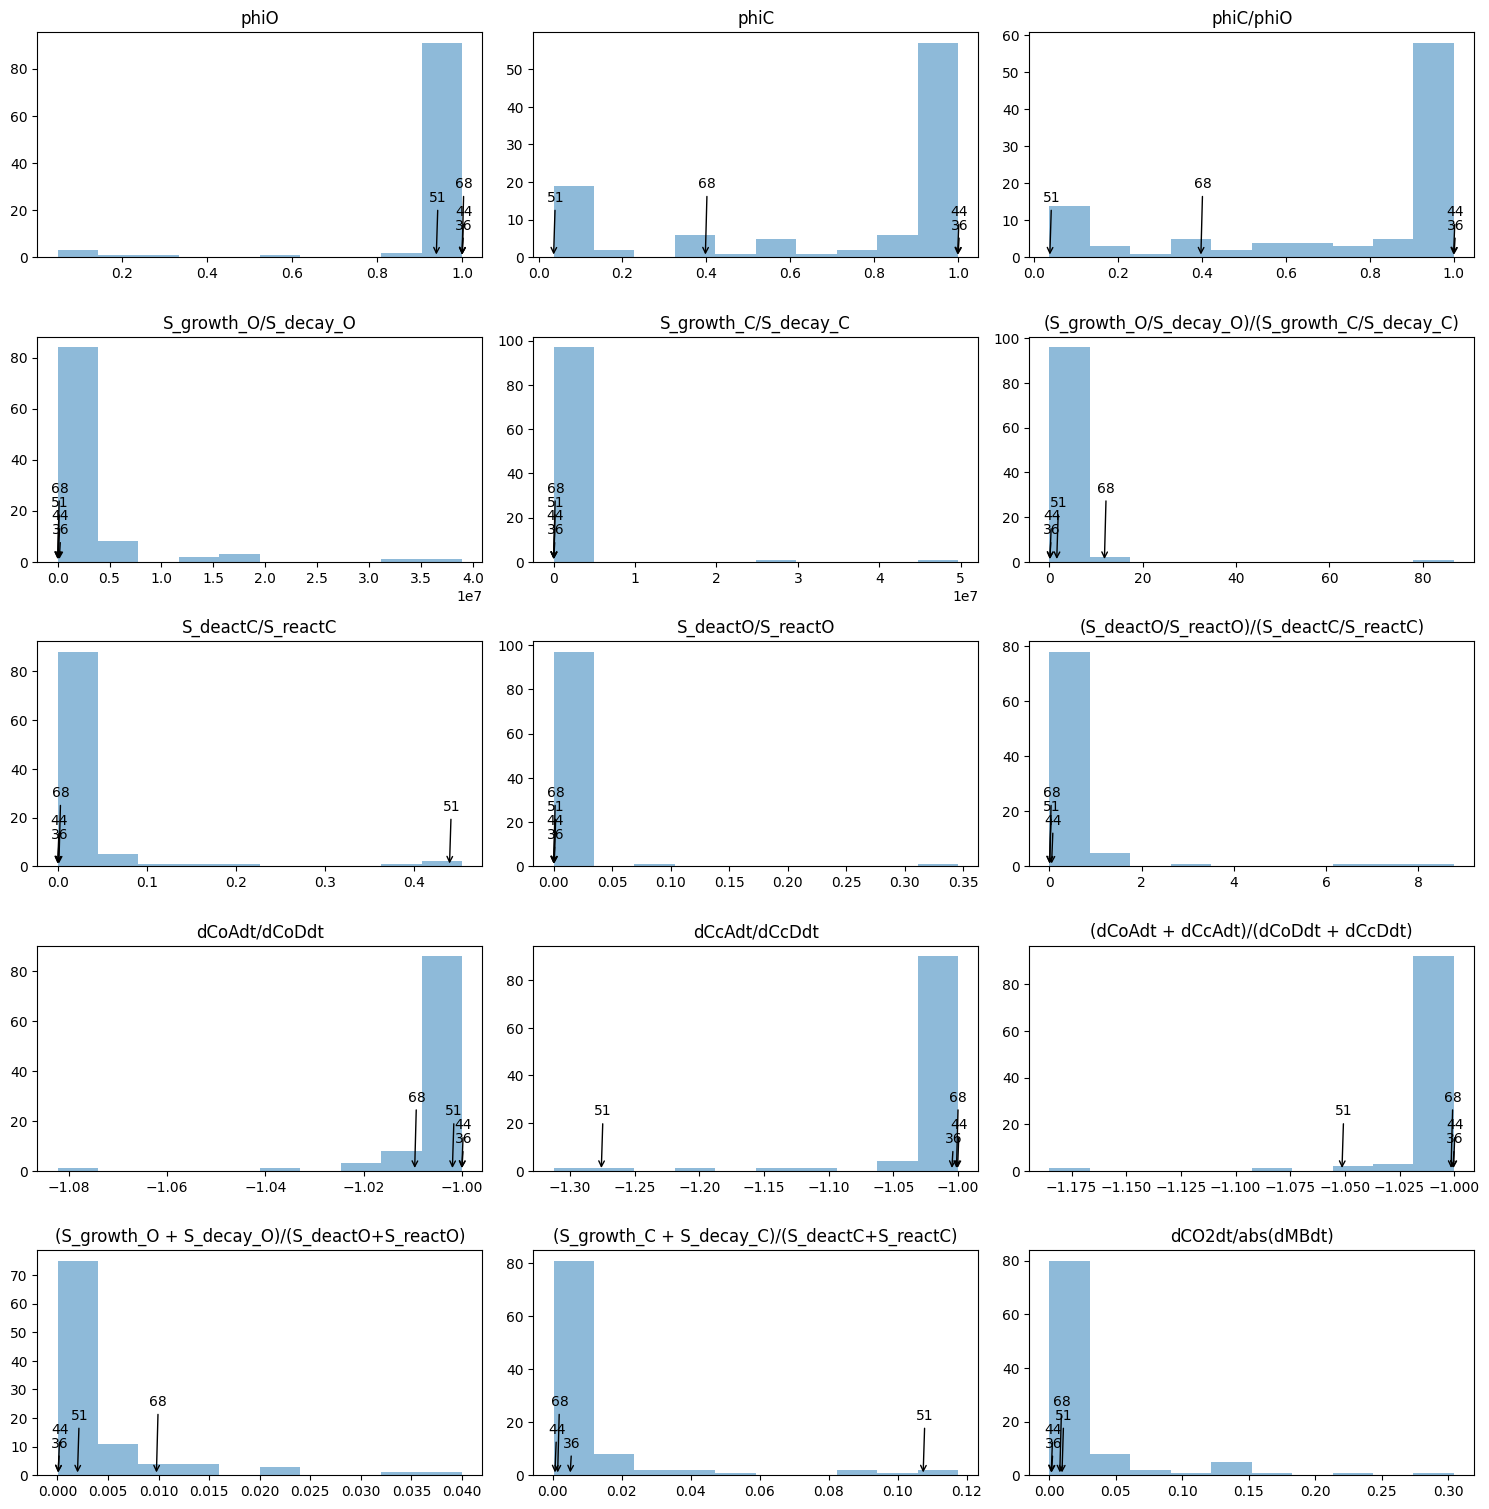

In [23]:

toEval = df

# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(toEval.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(toEval[column], alpha=0.5)
    ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = toEval[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(toEval.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

/tmp/ipykernel_336654/404940161.py:18: RuntimeWarning: divide by zero encountered in log10
  bins=np.logspace(np.log10(min( toEval[column])),
/home/m.giraud/.local/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/m.giraud/.local/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/tmp/ipykernel_336654/404940161.py:18: RuntimeWarning: invalid value encountered in log10
  bins=np.logspace(np.log10(min( toEval[column])),
/tmp/ipykernel_336654/404940161.py:19: RuntimeWarning: invalid value encountered in log10
  np.log10(max( toEval[column])), 50))


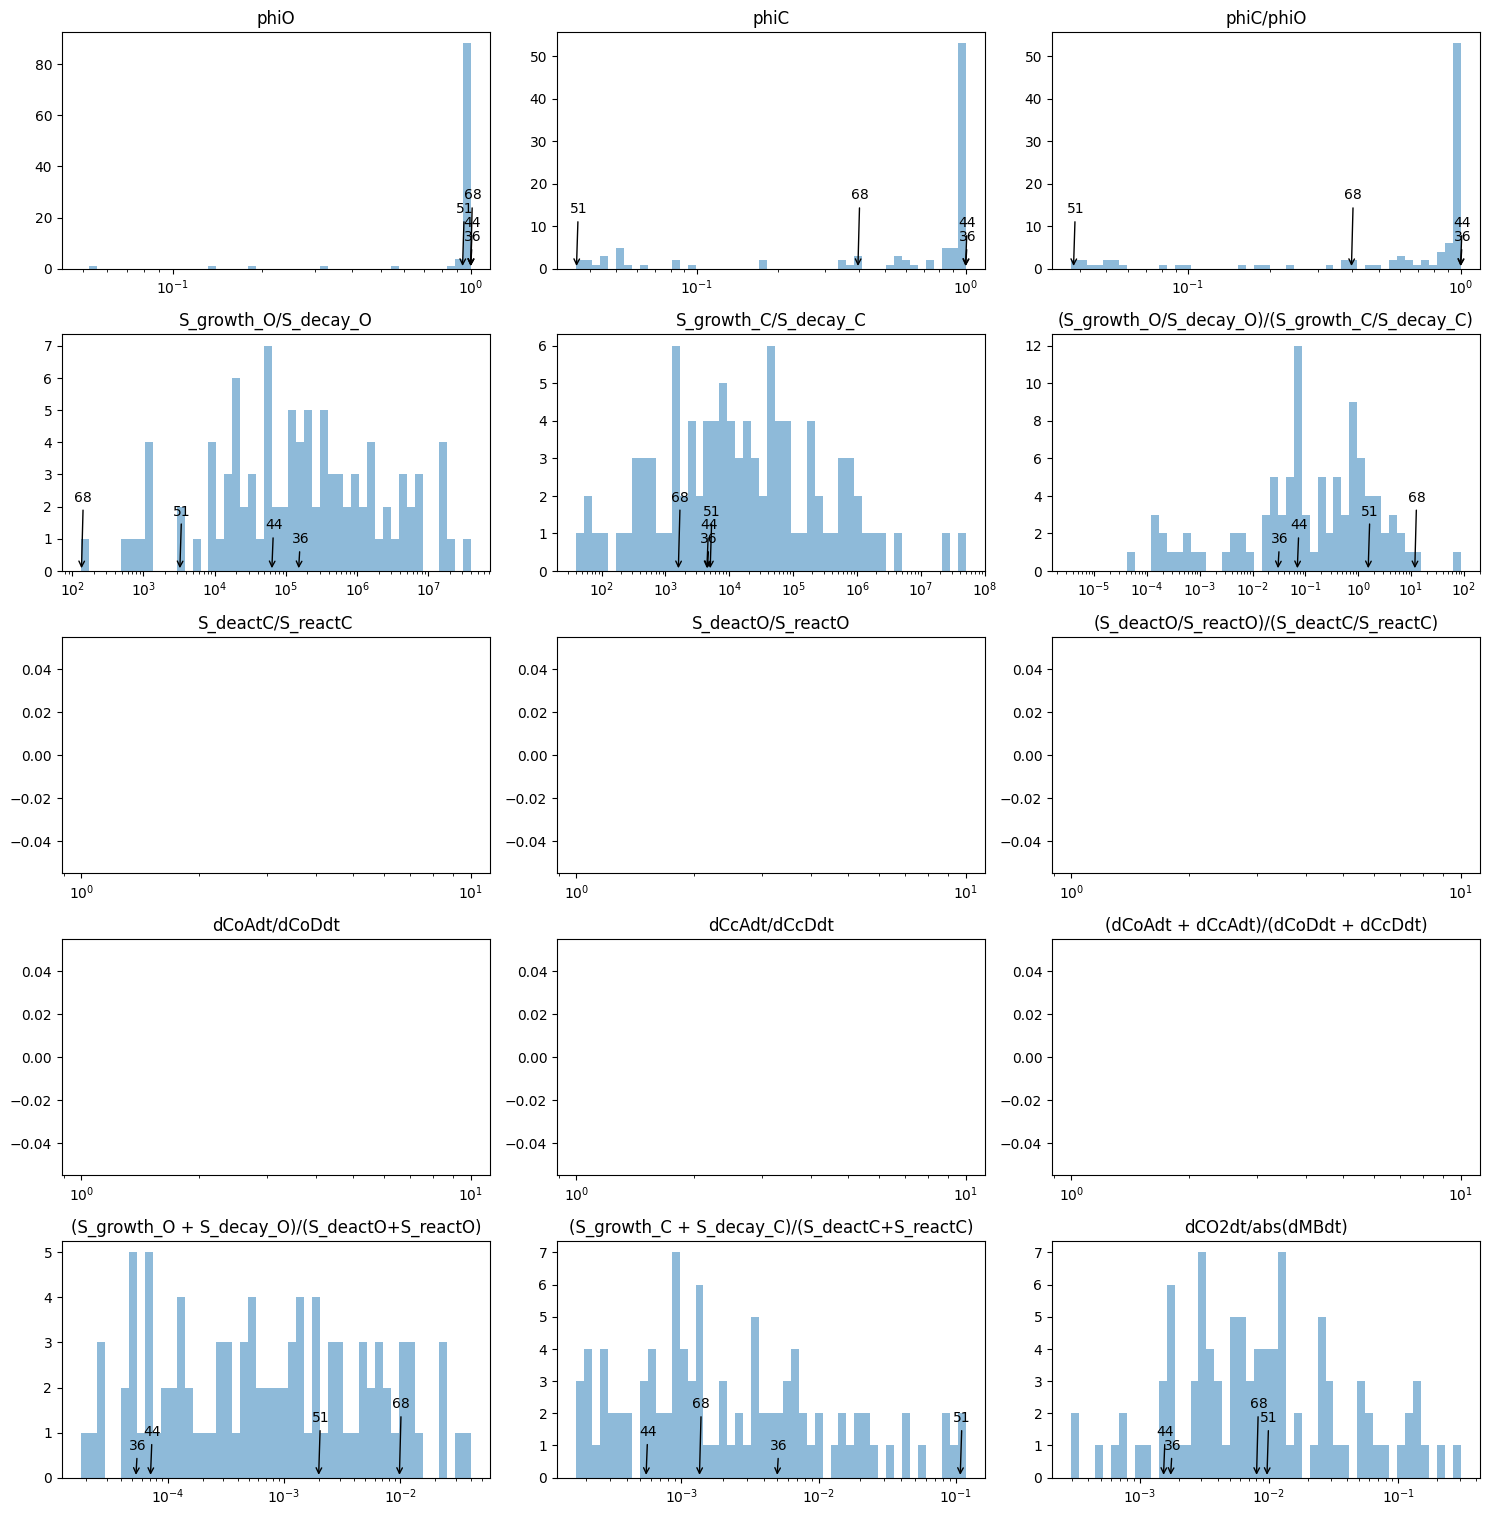

In [24]:

toEval = df

# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(toEval.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(toEval[column], alpha=0.5,
            bins=np.logspace(np.log10(min( toEval[column])),
                             np.log10(max( toEval[column])), 50))
    ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = toEval[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    ax.set_xscale('log')

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(toEval.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()